# Web Scrape Boxing Results

In [2]:
from bs4 import BeautifulSoup as bs
import requests
import cloudscraper

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
scraper = cloudscraper.create_scraper()

url = "https://box.live/fight-results/"

page = scraper.get(url)

soup = bs(page.text, 'html.parser')

<!DOCTYPE html>
<html lang="en-US">
 <head>
  <meta charset="utf-8"/>
  <meta content="ie=edge" http-equiv="X-UA-Compatible">
   <meta content="width=device-width, initial-scale=1" name="viewport"/>
   <link href="https://gmpg.org/xfn/11" rel="profile"/>
   <link href="https://box.live/wp-content/themes/BoxLive%20Theme/assets/images/favicon.png" rel="shortcut icon">
    <link href="https://box.live/feed/" rel="alternate" title="RSS 2.0" type="application/rss+xml"/>
    <link href="https://box.live/feed/rss/" rel="alternate" title="RSS .92" type="text/xml"/>
    <link href="https://box.live/feed/atom/" rel="alternate" title="Atom 0.3" type="application/atom+xml"/>
    <meta content="86ef0b2ecc201b1b9aee75378ddf71c1" name="p:domain_verify">
     <link crossorigin="use-credentials" href="https://box.live/wp-content/themes/BoxLive%20Theme/assets/manifest.webmanifest.json" rel="manifest"/>
     <meta content="One Boxing Site To Unify Them All" property="og:description"/>
     <script type="
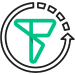
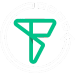

In [4]:
print(soup.prettify())

In [5]:
recent_fights_table = soup.find('table')

In [6]:
print(recent_fights_table)

<table class="table table-responsive" id="boxing-results-table">
<caption>Boxing Results</caption>
<thead>
<tr>
<th>Date</th>
<th>Fighter 1</th>
<th>Result</th>
<th>Method / Round</th>
<th>Fighter 2</th>
<th>Result</th>
<th>Method / Round</th>
<th>Venue</th>
<th>Undercard fights</th>
</tr>
</thead>
<tbody>
<tr>
<td><a href="https://box.live/fights/tapales-vs-jet/">Sunday, 27 April 2025</a>
</td>
<td>Marlon Tapales</td>
<td>Winner</td>
<td>RTD, Round 3</td>
<td>Jon Jon Jet</td>
<td>Loser</td>
<td>RTD, Round 3</td>
<td>General Santos City, Cotabato del Sur, Philippines</td>
<td>
</td>
</tr>
<tr>
<td><a href="https://box.live/fights/eubank-jr-vs-benn/">Saturday, 26 April 2025</a>
</td>
<td>Chris Eubank Jr</td>
<td>Winner</td>
<td>UD, Round 12</td>
<td>Conor Benn</td>
<td>Loser</td>
<td>UD, Round 12</td>
<td>Tottenham Hotspur Stadium, London, United Kingdom</td>
<td>
<ul>
<li>Anthony Yarde Beat  Lyndon Arthur (UD 12) </li>
<li>Aaron McKenna Beat  Liam Smith (UD 12) </li>
<li>Viddal Riley B

In [7]:
recent_fights_cols = recent_fights_table.find_all('th')

In [8]:
recent_fights_cols

[<th>Date</th>,
 <th>Fighter 1</th>,
 <th>Result</th>,
 <th>Method / Round</th>,
 <th>Fighter 2</th>,
 <th>Result</th>,
 <th>Method / Round</th>,
 <th>Venue</th>,
 <th>Undercard fights</th>]

In [9]:
recent_fights_cols = [col.text.strip() for col in recent_fights_cols]
# Rename duplicate columns explicitly
for i, col in enumerate(recent_fights_cols):
    if recent_fights_cols.count(col) > 1:
        count = recent_fights_cols[:i].count(col) + 1
        recent_fights_cols[i] = f"{col} Fighter {count}"
print(recent_fights_cols)

['Date', 'Fighter 1', 'Result Fighter 1', 'Method / Round Fighter 1', 'Fighter 2', 'Result', 'Method / Round', 'Venue', 'Undercard fights']


In [10]:
recent_fights_df = pd.DataFrame(columns = recent_fights_cols)
recent_fights_df

,Date,Fighter 1,Result Fighter 1,Method / Round Fighter 1,Fighter 2,Result,Method / Round,Venue,Undercard fights


In [11]:
column_rows = recent_fights_table.find_all('tr')
column_rows

[<tr>
 <th>Date</th>
 <th>Fighter 1</th>
 <th>Result</th>
 <th>Method / Round</th>
 <th>Fighter 2</th>
 <th>Result</th>
 <th>Method / Round</th>
 <th>Venue</th>
 <th>Undercard fights</th>
 </tr>,
 <tr>
 <td><a href="https://box.live/fights/tapales-vs-jet/">Sunday, 27 April 2025</a>
 </td>
 <td>Marlon Tapales</td>
 <td>Winner</td>
 <td>RTD, Round 3</td>
 <td>Jon Jon Jet</td>
 <td>Loser</td>
 <td>RTD, Round 3</td>
 <td>General Santos City, Cotabato del Sur, Philippines</td>
 <td>
 </td>
 </tr>,
 <tr>
 <td><a href="https://box.live/fights/eubank-jr-vs-benn/">Saturday, 26 April 2025</a>
 </td>
 <td>Chris Eubank Jr</td>
 <td>Winner</td>
 <td>UD, Round 12</td>
 <td>Conor Benn</td>
 <td>Loser</td>
 <td>UD, Round 12</td>
 <td>Tottenham Hotspur Stadium, London, United Kingdom</td>
 <td>
 <ul>
 <li>Anthony Yarde Beat  Lyndon Arthur (UD 12) </li>
 <li>Aaron McKenna Beat  Liam Smith (UD 12) </li>
 <li>Viddal Riley Beat  Cheavon Clarke (UD 12) </li>
 <li>Chris Billam Smith Beat  Brandon Glanton (UD

In [12]:
column_rows[1:]

[<tr>
 <td><a href="https://box.live/fights/tapales-vs-jet/">Sunday, 27 April 2025</a>
 </td>
 <td>Marlon Tapales</td>
 <td>Winner</td>
 <td>RTD, Round 3</td>
 <td>Jon Jon Jet</td>
 <td>Loser</td>
 <td>RTD, Round 3</td>
 <td>General Santos City, Cotabato del Sur, Philippines</td>
 <td>
 </td>
 </tr>,
 <tr>
 <td><a href="https://box.live/fights/eubank-jr-vs-benn/">Saturday, 26 April 2025</a>
 </td>
 <td>Chris Eubank Jr</td>
 <td>Winner</td>
 <td>UD, Round 12</td>
 <td>Conor Benn</td>
 <td>Loser</td>
 <td>UD, Round 12</td>
 <td>Tottenham Hotspur Stadium, London, United Kingdom</td>
 <td>
 <ul>
 <li>Anthony Yarde Beat  Lyndon Arthur (UD 12) </li>
 <li>Aaron McKenna Beat  Liam Smith (UD 12) </li>
 <li>Viddal Riley Beat  Cheavon Clarke (UD 12) </li>
 <li>Chris Billam Smith Beat  Brandon Glanton (UD 12) </li>
 </ul>
 </td>
 </tr>,
 <tr>
 <td><a href="https://box.live/fights/whittaker-vs-cameron-ii/">Sunday, 20 April 2025</a>
 </td>
 <td>Ben Whittaker</td>
 <td>Winner</td>
 <td>TKO, Round 2</

In [13]:
for row in column_rows[1:] :
    row_data = row.find_all('td') # get all individual rows using td

    # get individual row to be appended
    individual_row_data = [data.text.strip() for data in row_data]
    print(individual_row_data)

    
    if individual_row_data[len(individual_row_data) - 1] == '' :
       individual_row_data[len(individual_row_data) - 1] = 'NaN'

    # append
    length = len(recent_fights_df)
    recent_fights_df.loc[length] = individual_row_data

['Sunday, 27 April 2025', 'Marlon Tapales', 'Winner', 'RTD, Round 3', 'Jon Jon Jet', 'Loser', 'RTD, Round 3', 'General Santos City, Cotabato del Sur, Philippines', '']
['Saturday, 26 April 2025', 'Chris Eubank Jr', 'Winner', 'UD, Round 12', 'Conor Benn', 'Loser', 'UD, Round 12', 'Tottenham Hotspur Stadium, London, United Kingdom', 'Anthony Yarde Beat  Lyndon Arthur (UD 12) \nAaron McKenna Beat  Liam Smith (UD 12) \nViddal Riley Beat  Cheavon Clarke (UD 12) \nChris Billam Smith Beat  Brandon Glanton (UD 12)']
['Sunday, 20 April 2025', 'Ben Whittaker', 'Winner', 'TKO, Round 2', 'Liam Cameron', 'Loser', 'TKO, Round 2', 'Resorts World Arena, Birmingham, United Kingdom', 'Sam Eggington Beat  Lee Cutler (TD 9) \nFrazer Clarke Beat  Ebenezer Tetteh (TKO 1) \nTyler Denny Beat  Elvis Ahorgah (PTS 10)']
['Saturday, 19 April 2025', 'Dalton Smith', 'Winner', 'UD, Round 12', 'Mathieu Germain', 'Loser', 'UD, Round 12', 'Park Community Arena, Sheffield, United Kingdom', 'Caoimhin Agyarko Beat  Ryan K

In [14]:
recent_fights_df

,Date,Fighter 1,Result Fighter 1,Method / Round Fighter 1,Fighter 2,Result,Method / Round,Venue,Undercard fights
0,"Sunday, 27 April 2025",Marlon Tapales,Winner,"RTD, Round 3",Jon Jon Jet,Loser,"RTD, Round 3","General Santos City, Cotabato del Sur, Philipp...",NaN
1,"Saturday, 26 April 2025",Chris Eubank Jr,Winner,"UD, Round 12",Conor Benn,Loser,"UD, Round 12","Tottenham Hotspur Stadium, London, United Kingdom",Anthony Yarde Beat Lyndon Arthur (UD 12) \nAa...
2,"Sunday, 20 April 2025",Ben Whittaker,Winner,"TKO, Round 2",Liam Cameron,Loser,"TKO, Round 2","Resorts World Arena, Birmingham, United Kingdom",Sam Eggington Beat Lee Cutler (TD 9) \nFrazer...
3,"Saturday, 19 April 2025",Dalton Smith,Winner,"UD, Round 12",Mathieu Germain,Loser,"UD, Round 12","Park Community Arena, Sheffield, United Kingdom",Caoimhin Agyarko Beat Ryan Kelly (MD 10) \nJo...
4,"Saturday, 19 April 2025",Gabriela Fundora,Winner,"TKO, Round 7",Marilyn Badillo Amaya,Loser,"TKO, Round 7","Frontwave Arena, Oceanside, CA, United States",Jorge Perez Beat Charles Conwell (SD 12) \nOl...
5,"Saturday, 19 April 2025",Sadriddin Akhmedov,Draw,"MD, Round 10",Elias Espadas,Draw,"MD, Round 10","Commerce Casino, Commerce, CA, United States",NaN
6,"Friday, 18 April 2025",Sergey Kovalev,Winner,"KO, Round 7",Artur Mann,Loser,"KO, Round 7","Yunost Arena, Chelyabinsk, Russian Federation",NaN
7,"Friday, 18 April 2025",Kevin Hayler Brown,Winner,"UD, Round 10",Esteuri Metiver Suero,Loser,"UD, Round 10","Caribe Royale Orlando, Orlando, FL, United States",Lenier Pero Beat Detrailous Webster (UD 10) \...
8,"Thursday, 17 April 2025",Holy Dorgbetor,Winner,"SD, Round 6",Oleksandr Solomennikov,Loser,"SD, Round 6","Global Theater Boulevard Riyadh City, Riyadh, ...",NaN
9,"Saturday, 12 April 2025",Jaron ‘Boots’ Ennis,Winner,"RTD, Round 6",Eimantas Stanionis,Loser,"RTD, Round 6","Boardwalk Hall, Atlantic City, NJ, United States",Raymond Ford Beat Thomas Mattice (UD 10) \nSh...


In [15]:
recent_fights_df.columns

Index(['Date', 'Fighter 1', 'Result Fighter 1', 'Method / Round Fighter 1',
       'Fighter 2', 'Result', 'Method / Round', 'Venue', 'Undercard fights'],
      dtype='object')

In [16]:
### EXTREMELY IMPORTANT: DEDUPLICATE COLUMN NAMES
# recent_fights_df.columns = pd.Series(recent_fights_df.columns).apply(
#         lambda x: x if recent_fights_df.columns.tolist().count(x) == 1 else f"{x}.{recent_fights_df.columns.tolist()[:recent_fights_df.columns.tolist().index(x)].count(x) + 1}"
#     )

In [17]:
recent_fights_df.columns = ['Date', 'fighter1', 'fighter1_result', 'method_or_round',
       'fighter2', 'Result Fighter 2', 'Method / Round Fighter 2', 'Venue', 'Undercard fights']

In [18]:
recent_fights_df

,Date,fighter1,fighter1_result,method_or_round,fighter2,Result Fighter 2,Method / Round Fighter 2,Venue,Undercard fights
0,"Sunday, 27 April 2025",Marlon Tapales,Winner,"RTD, Round 3",Jon Jon Jet,Loser,"RTD, Round 3","General Santos City, Cotabato del Sur, Philipp...",NaN
1,"Saturday, 26 April 2025",Chris Eubank Jr,Winner,"UD, Round 12",Conor Benn,Loser,"UD, Round 12","Tottenham Hotspur Stadium, London, United Kingdom",Anthony Yarde Beat Lyndon Arthur (UD 12) \nAa...
2,"Sunday, 20 April 2025",Ben Whittaker,Winner,"TKO, Round 2",Liam Cameron,Loser,"TKO, Round 2","Resorts World Arena, Birmingham, United Kingdom",Sam Eggington Beat Lee Cutler (TD 9) \nFrazer...
3,"Saturday, 19 April 2025",Dalton Smith,Winner,"UD, Round 12",Mathieu Germain,Loser,"UD, Round 12","Park Community Arena, Sheffield, United Kingdom",Caoimhin Agyarko Beat Ryan Kelly (MD 10) \nJo...
4,"Saturday, 19 April 2025",Gabriela Fundora,Winner,"TKO, Round 7",Marilyn Badillo Amaya,Loser,"TKO, Round 7","Frontwave Arena, Oceanside, CA, United States",Jorge Perez Beat Charles Conwell (SD 12) \nOl...
5,"Saturday, 19 April 2025",Sadriddin Akhmedov,Draw,"MD, Round 10",Elias Espadas,Draw,"MD, Round 10","Commerce Casino, Commerce, CA, United States",NaN
6,"Friday, 18 April 2025",Sergey Kovalev,Winner,"KO, Round 7",Artur Mann,Loser,"KO, Round 7","Yunost Arena, Chelyabinsk, Russian Federation",NaN
7,"Friday, 18 April 2025",Kevin Hayler Brown,Winner,"UD, Round 10",Esteuri Metiver Suero,Loser,"UD, Round 10","Caribe Royale Orlando, Orlando, FL, United States",Lenier Pero Beat Detrailous Webster (UD 10) \...
8,"Thursday, 17 April 2025",Holy Dorgbetor,Winner,"SD, Round 6",Oleksandr Solomennikov,Loser,"SD, Round 6","Global Theater Boulevard Riyadh City, Riyadh, ...",NaN
9,"Saturday, 12 April 2025",Jaron ‘Boots’ Ennis,Winner,"RTD, Round 6",Eimantas Stanionis,Loser,"RTD, Round 6","Boardwalk Hall, Atlantic City, NJ, United States",Raymond Ford Beat Thomas Mattice (UD 10) \nSh...


In [25]:
recent_fights_df = recent_fights_df.drop(columns=['Method / Round Fighter 2','Result Fighter 2'])

### link finder web scraping (EXPANSION)

In [26]:
link_rows = recent_fights_table.find_all('a')
link_rows

[<a href="https://box.live/fights/tapales-vs-jet/">Sunday, 27 April 2025</a>,
 <a href="https://box.live/fights/eubank-jr-vs-benn/">Saturday, 26 April 2025</a>,
 <a href="https://box.live/fights/whittaker-vs-cameron-ii/">Sunday, 20 April 2025</a>,
 <a href="https://box.live/fights/smith-vs-germain/">Saturday, 19 April 2025</a>,
 <a href="https://box.live/fights/fundora-vs-amaya/">Saturday, 19 April 2025</a>,
 <a href="https://box.live/fights/akhmedov-vs-espadas/">Saturday, 19 April 2025</a>,
 <a href="https://box.live/fights/kovalev-vs-mann/">Friday, 18 April 2025</a>,
 <a href="https://box.live/fights/brown-vs-suero/">Friday, 18 April 2025</a>,
 <a href="https://box.live/fights/dorgbetor-vs-solomennikov/">Thursday, 17 April 2025</a>,
 <a href="https://box.live/fights/ennis-vs-stanionis/">Saturday, 12 April 2025</a>,
 <a href="https://box.live/fights/white-vs-romero/">Saturday, 12 April 2025</a>,
 <a href="https://box.live/fights/cruz-vs-prasovic/">Friday, 11 April 2025</a>]

In [27]:
# I guess get() is used on dictionaries
# so the row is a dictionary with href="link"
#
# key = href
# value = link
#
links = [link.get('href') for link in link_rows]
links

['https://box.live/fights/tapales-vs-jet/',
 'https://box.live/fights/eubank-jr-vs-benn/',
 'https://box.live/fights/whittaker-vs-cameron-ii/',
 'https://box.live/fights/smith-vs-germain/',
 'https://box.live/fights/fundora-vs-amaya/',
 'https://box.live/fights/akhmedov-vs-espadas/',
 'https://box.live/fights/kovalev-vs-mann/',
 'https://box.live/fights/brown-vs-suero/',
 'https://box.live/fights/dorgbetor-vs-solomennikov/',
 'https://box.live/fights/ennis-vs-stanionis/',
 'https://box.live/fights/white-vs-romero/',
 'https://box.live/fights/cruz-vs-prasovic/']

In [28]:
print(type(links))
print(type(links[0]))

<class 'list'>
<class 'str'>


In [29]:
recent_fights_df['link'] = links

In [30]:
recent_fights_df.head()

,Date,fighter1,fighter1_result,method_or_round,fighter2,Venue,Undercard fights,link
0,"Sunday, 27 April 2025",Marlon Tapales,Winner,"RTD, Round 3",Jon Jon Jet,"General Santos City, Cotabato del Sur, Philipp...",NaN,https://box.live/fights/tapales-vs-jet/
1,"Saturday, 26 April 2025",Chris Eubank Jr,Winner,"UD, Round 12",Conor Benn,"Tottenham Hotspur Stadium, London, United Kingdom",Anthony Yarde Beat Lyndon Arthur (UD 12) \nAa...,https://box.live/fights/eubank-jr-vs-benn/
2,"Sunday, 20 April 2025",Ben Whittaker,Winner,"TKO, Round 2",Liam Cameron,"Resorts World Arena, Birmingham, United Kingdom",Sam Eggington Beat Lee Cutler (TD 9) \nFrazer...,https://box.live/fights/whittaker-vs-cameron-ii/
3,"Saturday, 19 April 2025",Dalton Smith,Winner,"UD, Round 12",Mathieu Germain,"Park Community Arena, Sheffield, United Kingdom",Caoimhin Agyarko Beat Ryan Kelly (MD 10) \nJo...,https://box.live/fights/smith-vs-germain/
4,"Saturday, 19 April 2025",Gabriela Fundora,Winner,"TKO, Round 7",Marilyn Badillo Amaya,"Frontwave Arena, Oceanside, CA, United States",Jorge Perez Beat Charles Conwell (SD 12) \nOl...,https://box.live/fights/fundora-vs-amaya/
